1. Create portfolio for the given stocks:
Google, amazon and tesla for the last 10 years.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define tickers and download data
tickers = ['GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2013-01-01", end="2023-12-31")['Adj Close']

[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOGL,TSLA
Date,,,
2013-01-03 00:00:00+00:00,0.004547,0.000581,-0.016685
2013-01-04 00:00:00+00:00,0.002592,0.019760,-0.010642
2013-01-07 00:00:00+00:00,0.035925,-0.004363,-0.001744
2013-01-08 00:00:00+00:00,-0.007748,-0.001973,-0.019220
2013-01-09 00:00:00+00:00,-0.000113,0.006573,-0.001187
...,...,...,...
2023-12-22 00:00:00+00:00,-0.002730,0.007620,-0.007701
2023-12-26 00:00:00+00:00,-0.000065,0.000212,0.016116
2023-12-27 00:00:00+00:00,-0.000456,-0.008126,0.018822


2. Visualize the expected returns on the 10
years series.

In [4]:
# Calculate daily returns
returns = data.pct_change().dropna()
returns

Ticker,AMZN,GOOGL,TSLA
Date,,,
2013-01-03 00:00:00+00:00,0.004547,0.000581,-0.016685
2013-01-04 00:00:00+00:00,0.002592,0.019760,-0.010642
2013-01-07 00:00:00+00:00,0.035925,-0.004363,-0.001744
2013-01-08 00:00:00+00:00,-0.007748,-0.001973,-0.019220
2013-01-09 00:00:00+00:00,-0.000113,0.006573,-0.001187
...,...,...,...
2023-12-22 00:00:00+00:00,-0.002730,0.007620,-0.007701
2023-12-26 00:00:00+00:00,-0.000065,0.000212,0.016116
2023-12-27 00:00:00+00:00,-0.000456,-0.008126,0.018822


3. Evaluate the annual daily mean return, correlation,
Sharpe ratio and daily standard mean return.

In [7]:
# Annual mean return
annual_mean_return = returns.mean() * 252

# Correlation matrix
correlation_matrix = returns.corr()

# Daily standard deviation
daily_std_dev = returns.std()

# Annualized Sharpe ratio
sharpe_ratios = (annual_mean_return / (daily_std_dev * np.sqrt(252)))
sharpe_ratios

1.1380653673006371

4. Formulate the Markowitz frontier.

In [8]:
# Portfolio optimization
num_portfolios = 10000
np.random.seed(42)

results = np.zeros((4, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std_dev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    results[3, i] = i

# Convert results to DataFrame
portfolios = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio', 'Index'])
portfolios

,Return,Risk,Sharpe Ratio,Index
0,0.362210,0.311797,1.161687,0.0
1,0.321379,0.298636,1.076158,1.0
2,0.368200,0.322557,1.141504,2.0
3,0.452901,0.397830,1.138426,3.0
4,0.314195,0.297238,1.057047,4.0
...,...,...,...,...
9995,0.273210,0.270016,1.011830,9995.0
9996,0.386436,0.330958,1.167629,9996.0
9997,0.305724,0.299210,1.021772,9997.0
9998,0.368389,0.318175,1.157818,9998.0


5. Discuss on the optimal portfolio and the
different parameters evaluated for the
portfolio.(Assuming Greater Return of
investment)

In [9]:
# Max Return
max_return_portfolio = portfolios.loc[portfolios['Return'].idxmax()]
max_return_weights = weights_record[int(max_return_portfolio['Index'])]

# Min Risk
min_risk_portfolio = portfolios.loc[portfolios['Risk'].idxmin()]
min_risk_weights = weights_record[int(min_risk_portfolio['Index'])]

# Portfolio with Return between Max and Min
target_return = (max_return_portfolio['Return'] + min_risk_portfolio['Return']) / 2
target_portfolios = portfolios[portfolios['Return'] < max_return_portfolio['Return']]
target_portfolios = target_portfolios[target_portfolios['Return'] > min_risk_portfolio['Return']]
optimal_portfolio = target_portfolios.loc[target_portfolios['Risk'].idxmin()]
optimal_weights = weights_record[int(optimal_portfolio['Index'])]


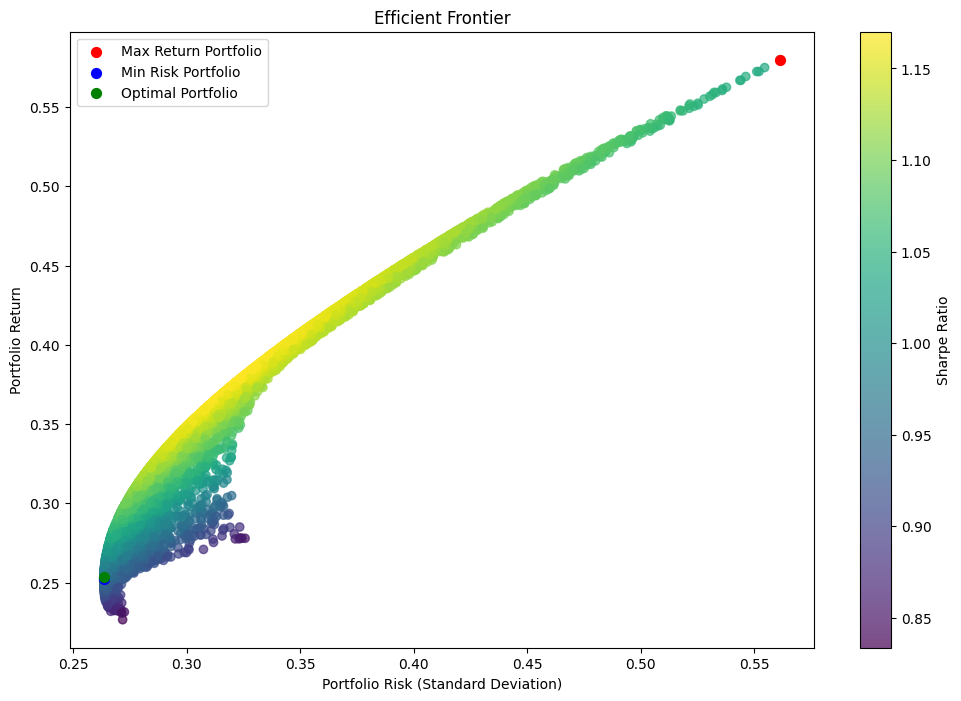

In [10]:
# Efficient frontier plot
plt.figure(figsize=(12, 8))
plt.scatter(portfolios['Risk'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_return_portfolio['Risk'], max_return_portfolio['Return'], c='red', label='Max Return Portfolio', s=50)
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], c='blue', label='Min Risk Portfolio', s=50)
plt.scatter(optimal_portfolio['Risk'], optimal_portfolio['Return'], c='green', label='Optimal Portfolio', s=50)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.show()


Compute max return and its associated risk

Compute MIN STD and its associated return

Compute a range return less than max and grater than min and its associated risk

-> Max Return Portfolio:
Highest return with associated risk,
Weights: max_return_weights.

->Min Risk Portfolio:
Lowest standard deviation with associated return,
Weights: min_risk_weights.

->Target Portfolio:
Balanced portfolio between min risk and max return,
Weights: optimal_weights.